In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("/Users/melissarejuan/Desktop/Course Materials/DS Capstone/Capstone_Cancer_Prediction/Breast Cancer METABRIC.csv")

## Data Cleaning

In [50]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   str    
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   str    
 3   Cancer Type                     2509 non-null   str    
 4   Cancer Type Detailed            2509 non-null   str    
 5   Cellularity                     1917 non-null   str    
 6   Chemotherapy                    1980 non-null   str    
 7   Pam50 + Claudin-low subtype     1980 non-null   str    
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   str    
 10  ER Status                       2469 non-null   str    
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    1980 non-null

In [51]:
df.isnull().sum().sort_values(ascending=False)

3-Gene classifier subtype         745
Tumor Stage                       721
Primary Tumor Laterality          639
Cellularity                       592
Type of Breast Surgery            554
Integrative Cluster               529
HER2 status measured by SNP6      529
Radio Therapy                     529
PR Status                         529
Inferred Menopausal State         529
Hormone Therapy                   529
HER2 Status                       529
Patient's Vital Status            529
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Overall Survival (Months)         528
Overall Survival Status           528
Lymph nodes examined positive     266
Nottingham prognostic index       222
Mutation Count                    152
Tumor Size                        149
Tumor Other Histologic Subtype    135
Relapse Free Status (Months)      121
Neoplasm Histologic Grade         121
ER status measured by IHC          83
ER Status                          40
Relapse Free

In [52]:
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [53]:
df["3-Gene classifier subtype"].unique()

<StringArray>
['ER-/HER2-', 'ER+/HER2- High Prolif', nan, 'ER+/HER2- Low Prolif', 'HER2+']
Length: 5, dtype: str

In [54]:
df.drop_duplicates()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


In [55]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   str    
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   str    
 3   Cancer Type                     2509 non-null   str    
 4   Cancer Type Detailed            2509 non-null   str    
 5   Cellularity                     1917 non-null   str    
 6   Chemotherapy                    1980 non-null   str    
 7   Pam50 + Claudin-low subtype     1980 non-null   str    
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   str    
 10  ER Status                       2469 non-null   str    
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    1980 non-null

In [56]:
df.isnull().sum().sort_values(ascending=False)

3-Gene classifier subtype         745
Tumor Stage                       721
Primary Tumor Laterality          639
Cellularity                       592
Type of Breast Surgery            554
Integrative Cluster               529
HER2 status measured by SNP6      529
Radio Therapy                     529
PR Status                         529
Inferred Menopausal State         529
Hormone Therapy                   529
HER2 Status                       529
Patient's Vital Status            529
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Overall Survival (Months)         528
Overall Survival Status           528
Lymph nodes examined positive     266
Nottingham prognostic index       222
Mutation Count                    152
Tumor Size                        149
Tumor Other Histologic Subtype    135
Relapse Free Status (Months)      121
Neoplasm Histologic Grade         121
ER status measured by IHC          83
ER Status                          40
Relapse Free

In [57]:
# drop sex column - redundant

df = df.drop(columns=["Sex"])

In [58]:
df = df.drop(columns=["Cancer Type"])

In [ ]:
# check for unique values in each column
df.nunique()

Patient ID                        2509
Age at Diagnosis                  1843
Type of Breast Surgery               2
Cancer Type Detailed                 8
Cellularity                          3
Chemotherapy                         2
Pam50 + Claudin-low subtype          7
Cohort                               9
ER status measured by IHC            2
ER Status                            2
Neoplasm Histologic Grade            3
HER2 status measured by SNP6         4
HER2 Status                          2
Tumor Other Histologic Subtype       8
Hormone Therapy                      2
Inferred Menopausal State            2
Integrative Cluster                 11
Primary Tumor Laterality             2
Lymph nodes examined positive       32
Mutation Count                      32
Nottingham prognostic index        436
Oncotree Code                        8
Overall Survival (Months)         1743
Overall Survival Status              2
PR Status                            2
Radio Therapy            

## EDA

/var/folders/cp/wlmtn6bs00zfcsnxb8mkgq540000gn/T/ipykernel_62620/4098064402.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


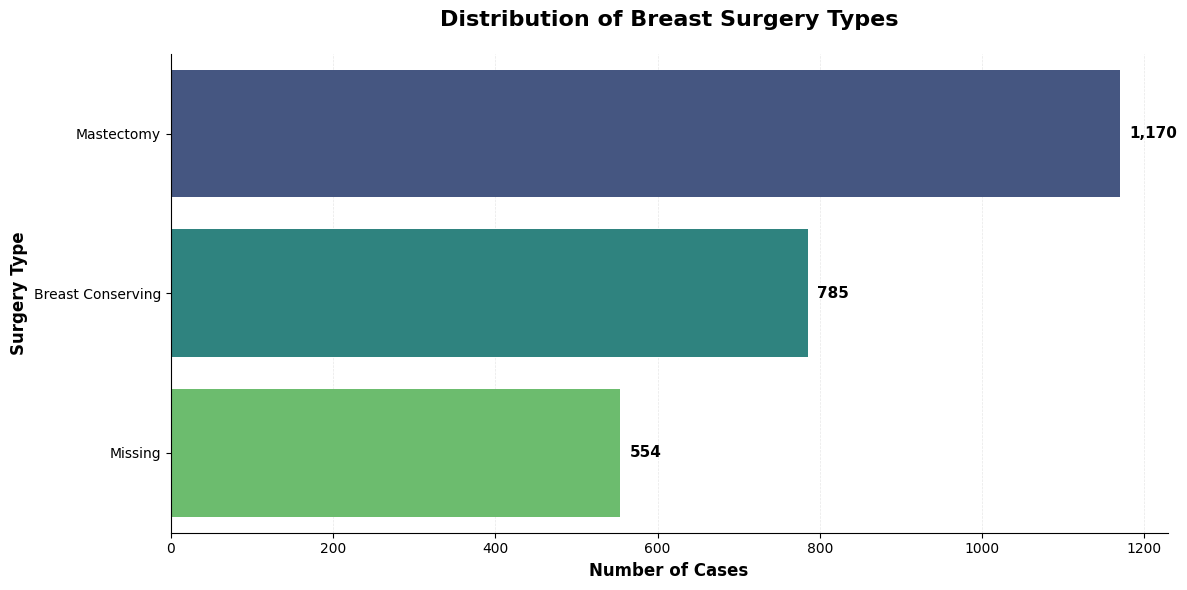

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# count surgeries, treat missing as a category
surgery_counts = df["Type of Breast Surgery"].fillna("Missing").value_counts()

# Create figure with better styling
plt.figure(figsize=(12, 6))

# Use a more sophisticated color palette
colors = sns.color_palette("viridis", len(surgery_counts))

# Create horizontal bar chart for better readability
ax = sns.barplot(
    y=surgery_counts.index, 
    x=surgery_counts.values, 
    palette=colors,
    orient='h'
)

# Improve title and labels
plt.title("Distribution of Breast Surgery Types", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Number of Cases", fontsize=12, fontweight='bold')
plt.ylabel("Surgery Type", fontsize=12, fontweight='bold')

# Add value labels at the end of each bar
for i, (p, v) in enumerate(zip(ax.patches, surgery_counts.values)):
    ax.text(v + max(surgery_counts.values) * 0.01, p.get_y() + p.get_height() / 2, 
            f'{v:,}', 
            ha='left', va='center', fontsize=11, fontweight='bold')

# Add gridlines for easier reading
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Remove top and right spines for cleaner look
sns.despine()

plt.tight_layout()
plt.show()

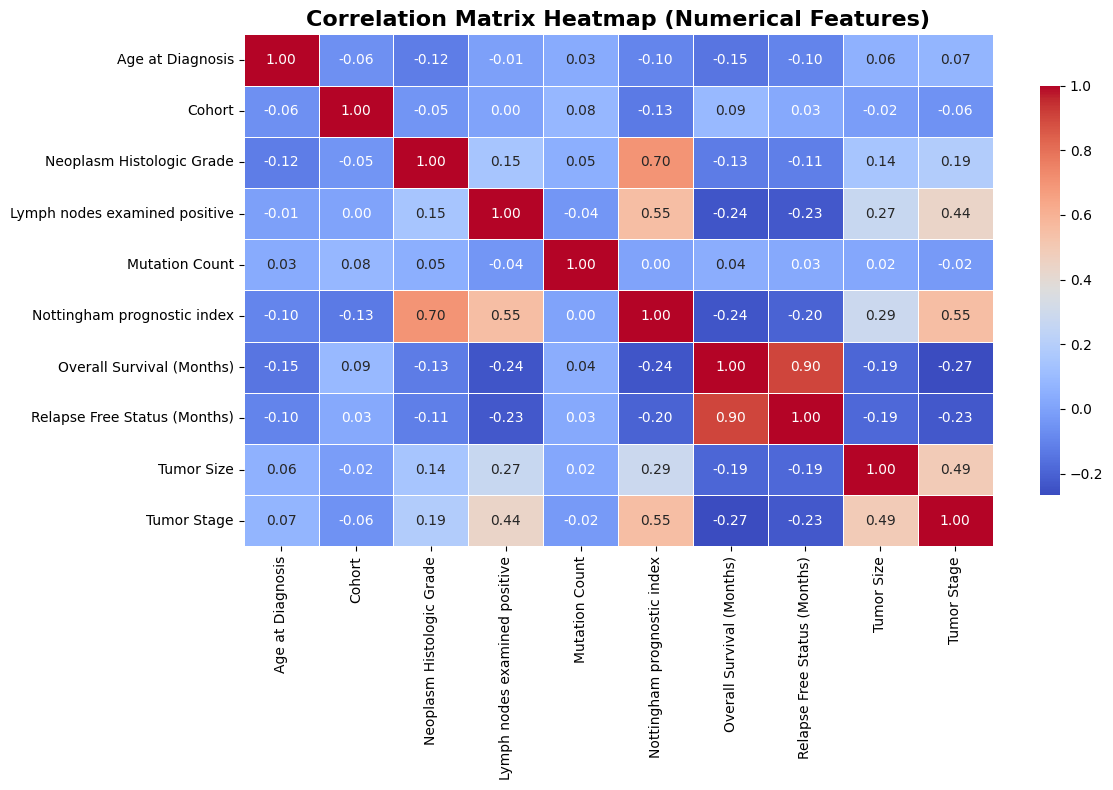

In [34]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix Heatmap (Numerical Features)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# df.to_csv('clean_metabric.csv')